In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import dask
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


### Load datasets

In [2]:
budgFw = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_fw.nc').budg_fw
budgH = xr.open_dataset('/mnt/efs/data/ecco/ecco_budg_heat.nc').budg_heat

In [3]:
flx = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_fw.nc')
nc = xr.open_dataset('/mnt/efs/data/ecco/ecco_section_transports_heat.nc')
flx['heat'] = nc.heat

### Compare Davis Strait with Fram Strait

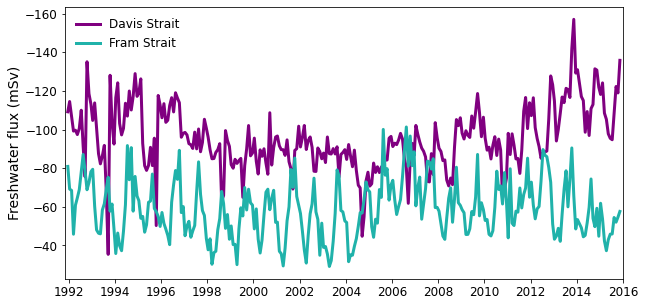

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(flx.time,flx.sel(section='Davis Strait').fw*1e3,lw=3,color='purple',linestyle='-',label='Davis Strait')
ax.plot(flx.time,flx.sel(section='Fram Strait').fw*1e3,lw=3,color='lightseagreen',linestyle='-',label='Fram Strait')

ax.set_xlim([date(1991, 12, 1), date(2016, 2, 1)])
ax.set_xticks(pd.date_range('1992-01-01','2018-01-01',freq='24M'))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel('Freshwater flux (mSv)',fontsize=14)
ax.legend(loc='upper left',frameon=False,fontsize=12)
ax.invert_yaxis()

#plt.savefig('/mnt/efs/figure.png')
#plt.savefig('/mnt/efs/figure.eps')
#plt.savefig('/mnt/efs/figure.pdf')
plt.show()

In [5]:
flx_DaS = flx.groupby('time.year').mean('time').sel(section='Davis Strait').fw*1e3
flx_FrS = flx.groupby('time.year').mean('time').sel(section='Fram Strait').fw*1e3

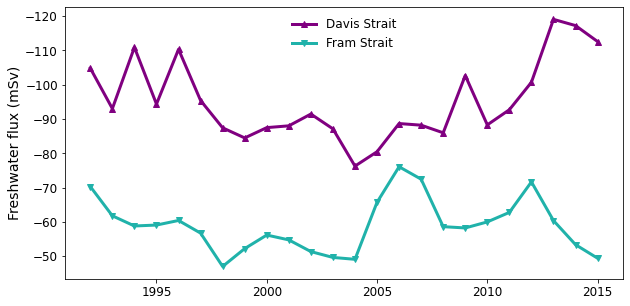

In [6]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(flx_DaS.year, flx_DaS, lw=3,color='purple',linestyle='-',marker='^',label='Davis Strait')
ax.plot(flx_FrS.year, flx_FrS, lw=3,color='lightseagreen',linestyle='-',marker='v',label='Fram Strait')

#ax.set_xlim([date(1991, 12, 1), date(2016, 2, 1)])
#ax.set_xticks(pd.date_range('1992-01-01','2018-01-01',freq='24M'))
#ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel('Freshwater flux (mSv)',fontsize=14)
ax.legend(loc='upper center',frameon=False,fontsize=12)
ax.invert_yaxis()

plt.show()